## Colorado Groundwater Data

In [1]:
# Importing required libraries
import dataretrieval.nwis as nwis
import pandas as pd
import matplotlib.pyplot as plt

### Fetching the data from the USGS NWIS via API call using the dataretrieval library

In [2]:
# Drought Well, Near Pueblo
# USGD URL: https://dashboard.waterdata.usgs.gov/api/gwis/2.1/service/site?agencyCode=USGS&siteNumber=382323104200701&open=212313

site = '382323104200701' # Site number for Drought Well, Near Pueblo
display(nwis.get_record(sites=site, service='site'))

# get instantaneous values (iv)
df_gwl_pueblo = nwis.get_record(sites=site, service='dv', start='2009-01-01', end='2024-02-08').reset_index()

display(df_gwl_pueblo.head()) # Raw data

df_gwl_pueblo = df_gwl_pueblo[['datetime', '72019_Mean']]
df_gwl_pueblo.columns = ['datetime', 'gwl']
df_gwl_pueblo['datetime'] = df_gwl_pueblo['datetime'].dt.date # Extracting date from datetime

# renameing datetime to date
df_gwl_pueblo = df_gwl_pueblo.rename(columns={'datetime': 'date'})


display(df_gwl_pueblo.head())

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,382323104200701,"SC01906221AAA DROUGHT WELL NEAR PUEBLO, CO",GW,382322.82,1042008.94,38.389672,-104.335817,M,S,...,Y,C,YYNYNYNN,N100ALLUVL,112TERC,U,90.0,90,D,858200240


,datetime,72019_Mean,72019_Mean_cd,site_no
0,2009-01-01 00:00:00+00:00,20.54,A,382323104200701
1,2009-01-02 00:00:00+00:00,20.53,A,382323104200701
2,2009-01-03 00:00:00+00:00,20.54,A,382323104200701
3,2009-01-04 00:00:00+00:00,20.54,A,382323104200701
4,2009-01-05 00:00:00+00:00,20.52,A,382323104200701


,date,gwl
0,2009-01-01,20.54
1,2009-01-02,20.53
2,2009-01-03,20.54
3,2009-01-04,20.54
4,2009-01-05,20.52


#### Drought Well, Near Pueblo Groundwater Level Data Analysis

In [4]:
# Summary of the data for Drought Well, Near Pueblo
display(df_gwl_pueblo.describe())

,gwl
count,5496.000000
mean,21.305551
std,0.477344
min,20.260000
25%,20.960000
50%,21.290000
75%,21.650000
max,22.330000


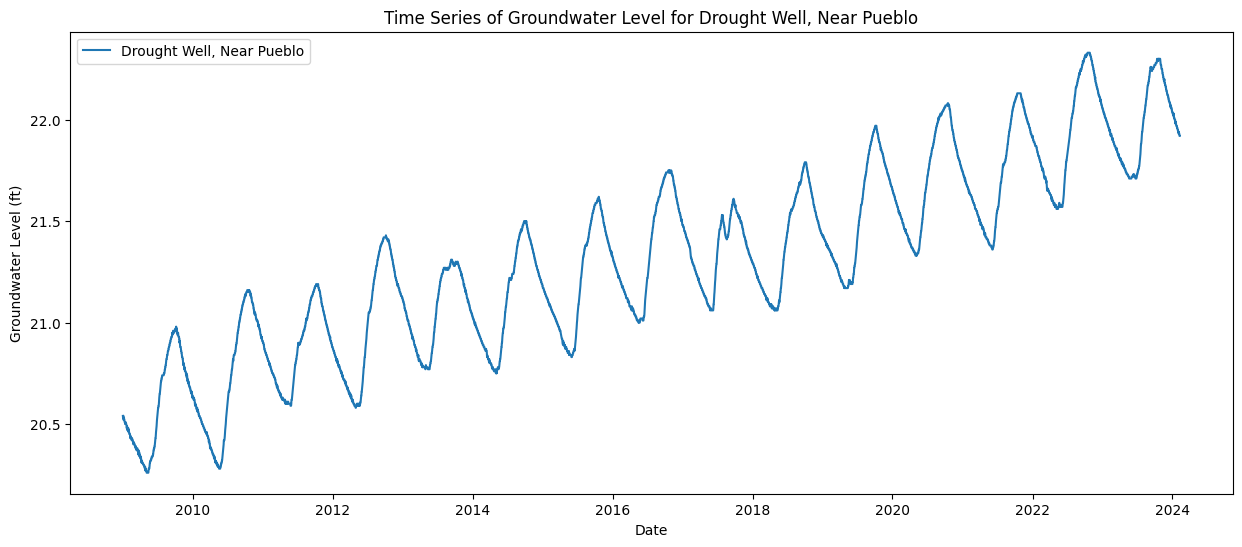

In [5]:
# Plotting time series for Drought Well, Near Pueblo

plt.figure(figsize=(15, 6))
plt.plot(df_gwl_pueblo['date'], df_gwl_pueblo['gwl'], label='Drought Well, Near Pueblo')
plt.xlabel('Date')
plt.ylabel('Groundwater Level (ft)')
plt.title('Time Series of Groundwater Level for Drought Well, Near Pueblo')
plt.legend()
plt.show()

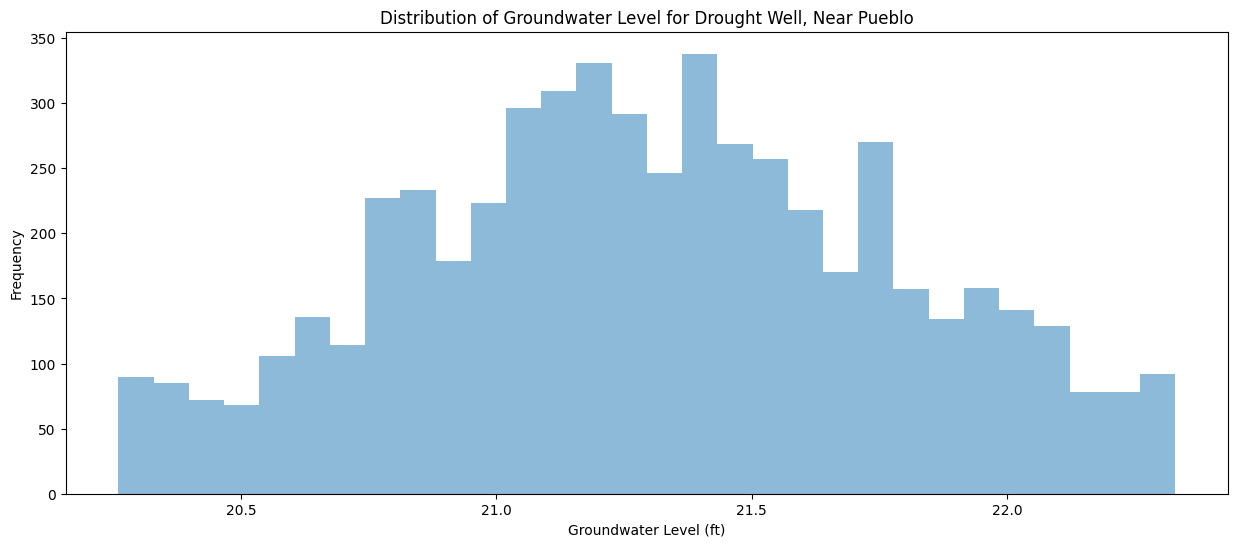

In [6]:
# Plotting distribution of groundwater level for Drought Well, Near Pueblo

plt.figure(figsize=(15, 6))
plt.hist(df_gwl_pueblo['gwl'], bins=30, alpha=0.5)
plt.xlabel('Groundwater Level (ft)')
plt.ylabel('Frequency')
plt.title('Distribution of Groundwater Level for Drought Well, Near Pueblo')
plt.show()

In [10]:
# Saving the data to parquet format for resuse

df_gwl_pueblo.to_parquet('data/gwl_data/pueblo.parquet')